## Encoder

We want to learn a model that can map a sentence to a fixed-length vector representation. This vector encodes the meaning of the sentence and thus can be used for many NLP tasks.



## Challanges of Sentences Encoding

Loss of information <br>
Let us take two sentences
How old are you?  and  What's your age? 
Both of the sentences have the same meaning but after embedding if we calculate the similarity between them, score will be quite low. This indicates a loss of information.

No Respect for Order<br>
Most of the embedder calculates embedding without taking care of the order of sentences.

Universal sentence encoder has solved such problems to some extend.


#  Universal Sentence Encoder(USE)

Universal sentence encoder models encode textual data into high-dimensional vectors which can be used for various NLP tasks. It was introduced by Daniel Cer, Yinfei Yang, Sheng-yi Kong, Nan Hua, Nicole Limtiaco, Rhomni St. John, Noah Constant, Mario Guajardo-Cespedes, Steve Yuan, Chris Tar, Yun-Hsuan Sung, Brian Strope and Ray Kurzweil (researchers at Google Research)  in April 2018. [(research paper) ](https://arxiv.org/pdf/1803.11175v2.pdf)

On a high level, the idea is to design an encoder that summarizes any given sentence to a 512-dimensional sentence embedding. We use this same embedding to solve multiple tasks and based on the mistakes it makes on those, we update the sentence embedding. Since the same embedding has to work on multiple generic tasks, it will capture only the most informative features and discard noise. The intuition is that this will result in an generic embedding that transfers universally to wide variety of NLP tasks such as text classification, semantic similarity, clustering and other natural language tasks.

Parts of Universal Sentence Encoder(USE) 

1. Tokenization <br>
First, the sentences are converted to lowercase and tokenized into tokens using the Penn Treebank(PTB) tokenizer.

2. Encoder


This is the component that encodes a sentence into fixed-length 512-dimension embedding. In the paper, there are two architectures proposed based on trade-offs in accuracy vs inference speed.


* Transformer Encoder


In this variant, we use the encoder part of the original transformer architecture. The architecture consists of 6 stacked transformer layers. Each layer has a self-attention module followed by a feed-forward network.

The self-attention process takes word order and surrounding context into account when generating each word representation. The output context-aware word embeddings are added element-wise and divided by the square root of the length of the sentence to account for the sentence-length difference. We get a 512-dimensional vector as output sentence embedding.

**This encoder has better accuracy on downstream tasks but higher memory and compute resource usage due to complex architecture.**


* Deep Averaging Network(DAN)

In this simpler variant, the encoder is based on the architecture proposed by [Deep Unordered Composition Rivals Syntactic Methods
for Text Classification](https://https://people.cs.umass.edu/~miyyer/pubs/2015_acl_dan.pdf)
First, the embeddings for word and bi-grams present in a sentence are averaged together. Then, they are passed through 4-layer feed-forward deep DNN to get 512-dimensional sentence embedding as output. The embeddings for word and bi-grams are learned during training.


**It has slightly reduced accuracy compared to the transformer variant, but the inference time is very efficient.**


# Example use

The model is implemented in Tensorflow and is available to downlaod from [TF Hub](https://https://tfhub.dev/google/universal-sentence-encoder/4).

This module is about 1GB. Depending on your network speed, it might take a while to load the first time you run inference with it.  Further, once a module is loaded to memory, inference time should be relatively fast.

The module does not require preprocessing the data before applying the module, it performs best effort text input preprocessing inside the graph.

Some example of using USE is given below:


Semantic Similarity

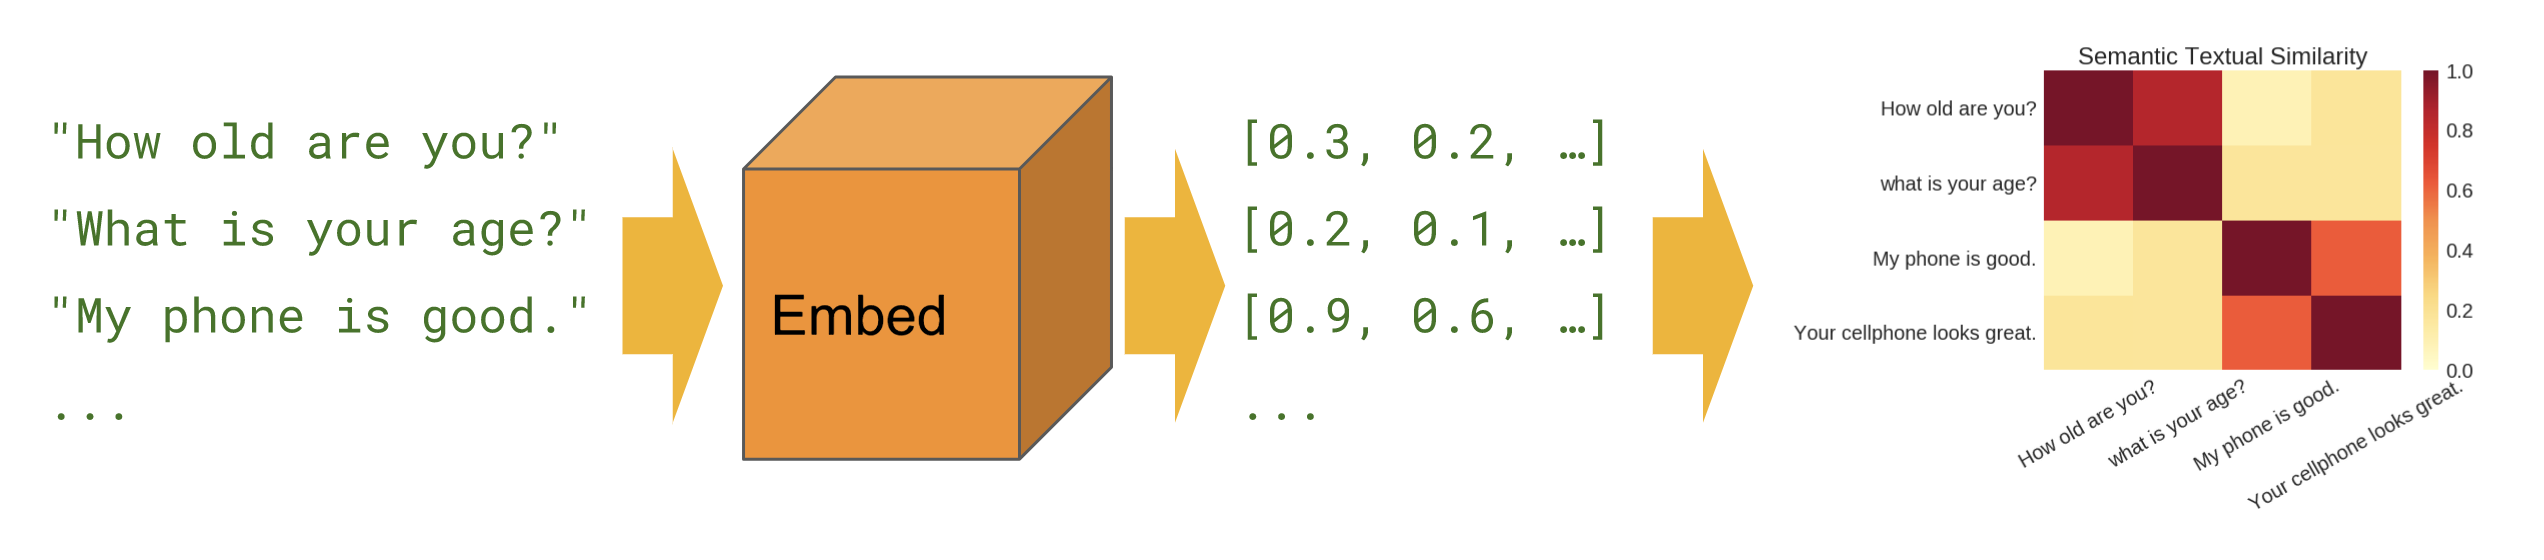

Classification

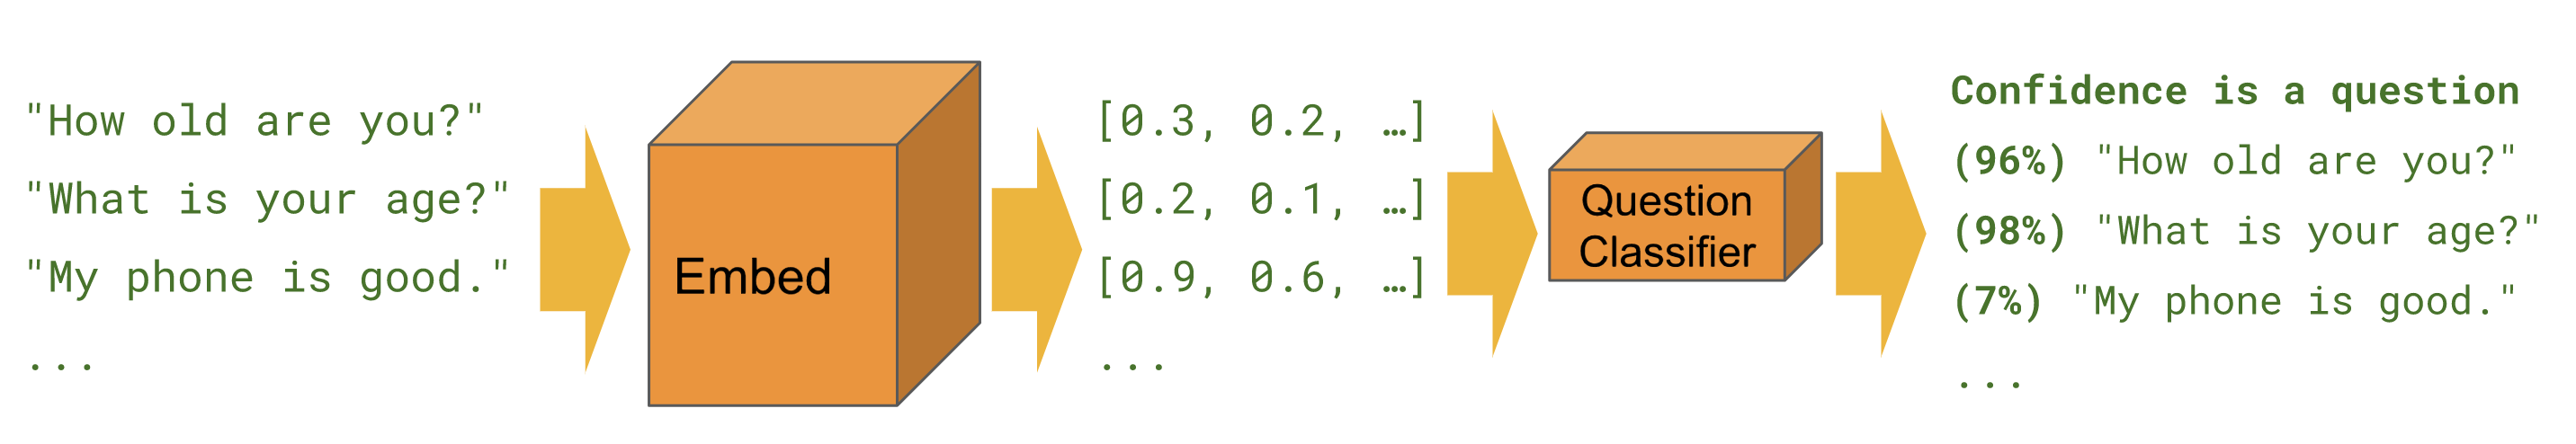

## Semantic Textual Similarity Task Example


Importing important module and library

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

Using version 5 of USE for embedding.

Creating simple heatmap to show similarity score.

In [ ]:
def plot_similarity(labels, features, rotation):
#compute inner product of the encodings
  corr = np.inner(features, features) 
  fig,ax=plt.subplots(figsize=(10,10))
  sns.set(font_scale=1.2)  
  g = sns.heatmap(  #plot heatmap 
      corr, annot=True, #computed inner product
      xticklabels=labels, #label the axes with input sentences
      yticklabels=labels,
#vmin and vmax are values to anchor the colormap
      vmin=0,
      vmax=1,
      cmap="YlOrRd") #matplotlib colormap name (here Yellow or Red)
  g.set_xticklabels(labels, rotation=rotation) 
  g.set_title("Semantic Textual Similarity")

In [ ]:
def run_and_plot(msgs):
  message_embeddings_ = embed(msgs)
  plot_similarity(msgs, message_embeddings_, 90)
#labels rotated by 90 degrees 

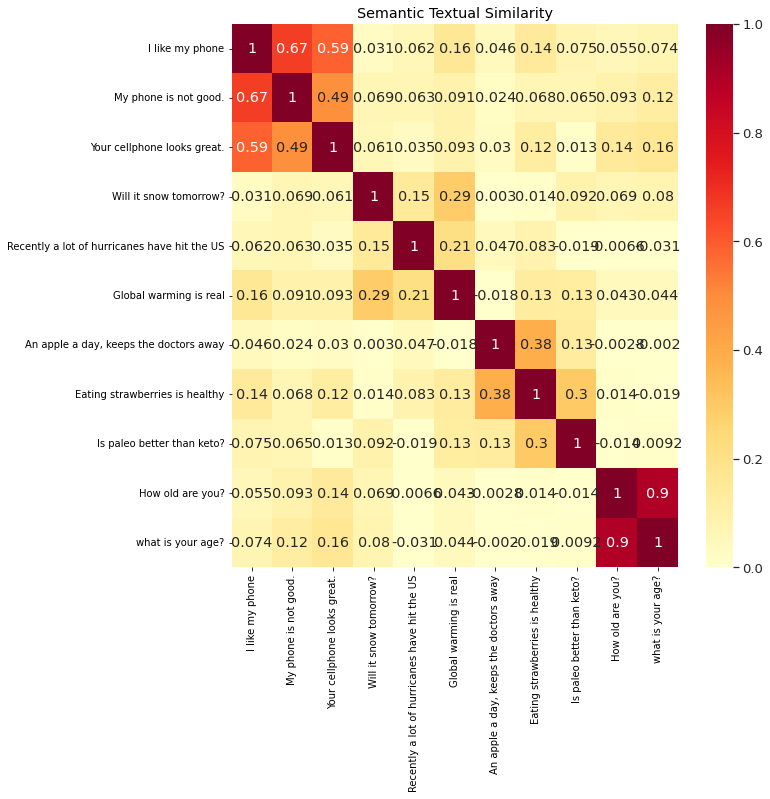

In [ ]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)